In [1]:
from numpy import cos, sin, radians, pi, sqrt, interp
import pandas as pd

Informações enunciado

In [2]:
m = 4
Np, Ng= 18, 54
theta = 20          
ωp = 1500 
sy = 330        #MPa
n = 3.5
η = 8           #%
v = 0.29 

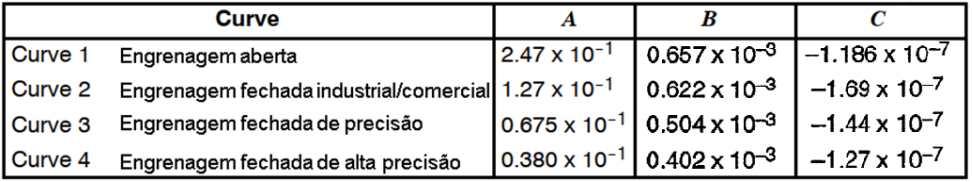

In [3]:
ft = [3.12, 1.69]                           #tabelado em função do número de dentes
r = [ft[0]*m, ft[1]*m] 

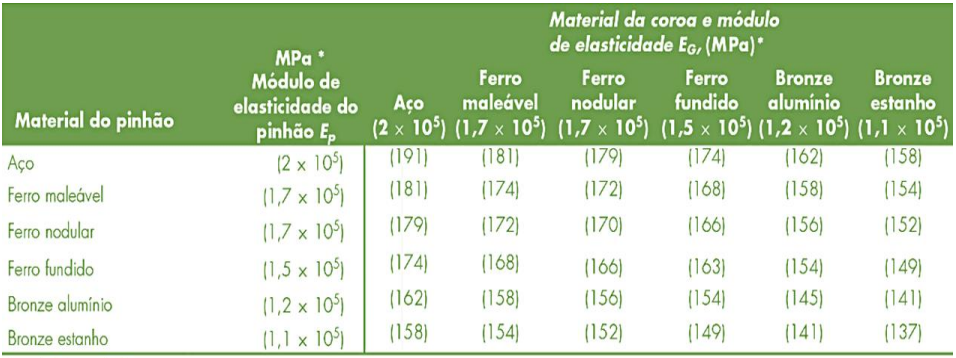

Informações tabeladas

In [4]:
Ep = Eg = 186*10**3     #MPa
vp = vg = v 

cte = [2.47*10**(-1),
      0.657*10**(-3),
     -1.186*10**(-7)]

Av = 7       #assumindo indice de qualidade 7

In [5]:
def de(N):
    return m*( N + 2 )                        #d_externo

def dr(N):
    return m*( N - 2.5 )                      #d_raiz

def dp(N):
    return m*N                                #d_primitivo  
         
def db(N):
    return cos(radians(theta))*dp(N)          #d_base

def V(N, ω):
    return (pi*ω/30)*(dp(N)/2000)             #velocidade linear

def KV(N, ω):
    return (6.1 + V(N, ω))/6.1                #fator de velocidade

In [6]:
p = m*pi                                 #passo circular
e = p/2                                  #espessura do dente
r = 0.3*m                                #raio do filete 
i = Ng/Np                                #relação de engrenamento
b = 12*m                                 #largura da face 6 a 16*m  
f = 0.3*m                                #cordão raiz do dente (ou raio do filete)
d_centros = ( dp(Np) + dp(Ng) )/2        #Distancia entre centros 

Fator de forma

In [7]:
def Y(N):
    N_l = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 28, 30, 34, 38, 43, 50, 60, 75, 100, 150, 300, 400]
    Y_l = [0.2450, 0.2610, 0.2770, 0.2900, 0.2960, 0.3030, 0.3090, 0.3140, 0.3220, 0.3280, 0.3310, 0.3370, 0.3460, 0.3530, 0.3590, 0.3710, 0.3840, 0.3970, 0.4090, 0.4220, 0.4350, 0.4470, 0.4600, 0.4720, 0.4800]
    return interp(N, N_l, Y_l)

In [8]:
σmax = sy/n
ωg = ωp/i

def wt(N, ω):
    return ( sy*b*m*Y(N) ) / ( n*KV(N, ω) )                                       #carga tangecial

def T(N, ω):                                                                      #torque
    return wt(N, ω)*(dp(N)/2000)

Pp, Pg = wt(N=Np, ω=ωp)*V(N=Np, ω=ωp), ( T(N=Ng, ω=ωg) * ωg )*(100 - η)/ ( 100 * 9.55 )      #potencia


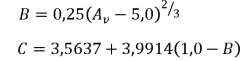

In [24]:
B = 0.25 * (Av - 5)**(2/3)
C = 3.5637 + 3.9914*( 1 - B )

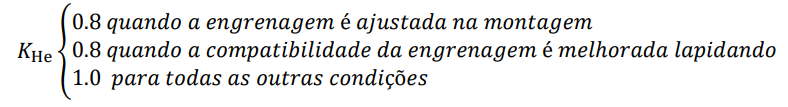

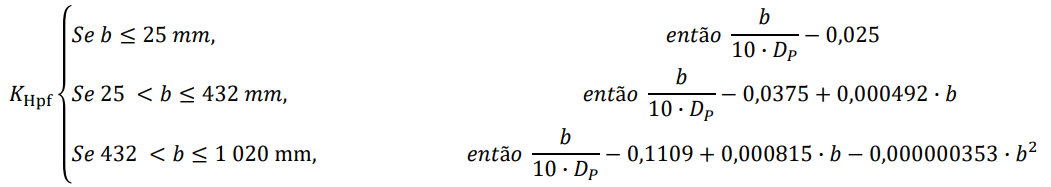

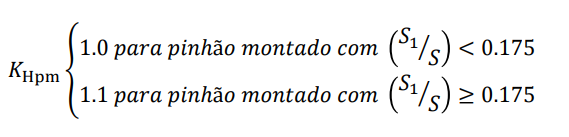

In [26]:
def Vdr(ω, dp):
    return (pi*ω/30)*(dp/2000)                   #velocidade linear no diametro primitivo  

In [31]:
Khma = cte[0] + cte[1]*b + cte[2]*(b**2)         #fator de alinhamento de engrenamento
Khe = 1                                          #fator de ajuste
Khpm = 1                                         #fator de carga de deflexão
Khmc = 1                                         #fator de formato da face do dente

def Khpf(Dp):
    return ( b/(10*Dp) ) - 0.0375 + 0.000492*b   #fator de proporção do pinhão

In [27]:
def Ko():
    return 1.25                                          #fator de sobrecarga      #motor elétrico que aciona uma bomba centrífuga de baixa velocidade

def Kh(dp):
    return 1 + Khmc * ( Khpf(dp) * Khpm + Khma * Khe)    #fator de distribuição de carga

def kv(V, ω, dp):
    return ( C / (C + sqrt(Vdr(ω, dp)) ) )**(-B)         #fator dinâmico

def Ks():
    return 1                                             #fator de tamanho

In [13]:
def Zr():
    return 1                                                                   #fator de condição de superfície

def Ze():
    return sqrt( 1/( pi * ( ( (1 - vp**2) / Ep) + (( 1 - vg**2 ) / Eg) ) ) )   #coeficiente de elasticidade

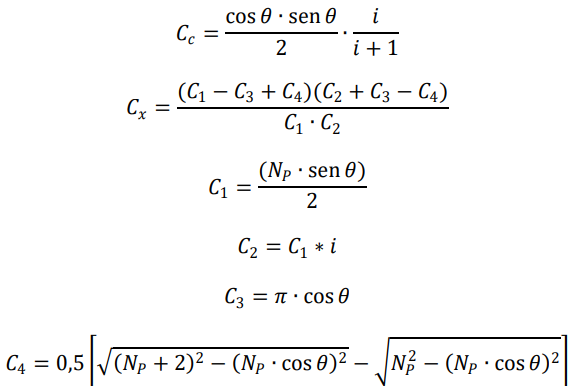

In [40]:
def C_c():
    return cos(radians(theta)) * sin(radians(theta)) * i / ( 2*(i+1) ) 

def C_1(N):
     return N*sin(radians(theta))/2

def C_2(N):
    return C_1(N)*i

def C_3(N):
    return pi*cos(radians(theta))

def C_4(N):
     return 0.5 * ( sqrt( ((N + 2)**2) - (N*cos( radians(theta)))**2 ) - sqrt( (N**2) - (N*cos( radians(theta) ))**2 ) )

def C_x(N):
    return (C_1(N) - C_3(N) + C_4(N))*(C_2(N) + C_3(N) - C_4(N)) / ( C_1(N)*C_2(N) )

In [42]:
def Zi(N):
    return C_c()*C_x(N)                # fator geométrico para resistência ao crateramento

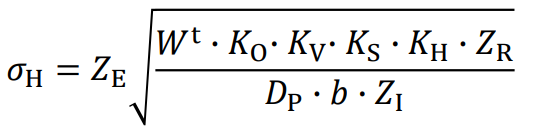

In [16]:
def 𝜎H(Wt, V, dp, N, ω):
    return 𝑍e()*sqrt( ( 𝑊t * 𝐾o() *  kv(V, ω, dp) * 𝐾s() * 𝐾h(dp) * 𝑍r() ) / (dp * 𝑏 * 𝑍i(N)) )    #tensão de contato

In [17]:
data = {
'': ['Pinhão', 'Coroa'],
'Diâmetro externo [mm]:': [round(de(Np), 2) , round(de(Ng), 2)],
'Diâmetro raiz [mm]:': [round(dr(Np), 2) , round(dr(Ng), 2)],
'Diâmetro primitivo [mm]:': [round(dp(Np), 2) , round(dp(Ng), 2)],
'Diâmetro base [mm]:': [round(db(Np), 2) , round(db(Ng), 2)],
'Cordão raiz do dente [mm]:': [round(f, 2) , round(f, 2)] ,
'Velocidade linear em [m/s]:': [round(V(N=Np, ω=ωp), 2) , round(V(N=Ng, ω=ωg), 2)] ,
'Largura da face nominal [mm]:': [round(b, 2) , round(b, 2)],
'Relação de engrenamento (i):': [round(i, 2) , round(i, 2)],
'Distância entre centros das engrenagens [mm]:': [round(d_centros, 2) , round(d_centros, 2)],
'Passo circular:': [round(p, 2) , round(p, 2)],
'Espessura do dente [mm]:': [round(e, 2) , round(e, 2)],
'Tensão máxima admissível [MPa]:': [round(σmax, 2) , round(σmax, 2)],
'Fator de velocidade:': [round(KV(N=Np, ω=ωp), 3) , round(KV(N=Np, ω=ωp), 3)],
'Fator de forma:': [round(Y(Np), 3) , round(Y(Ng), 3)],
'Carga tangencial [N]:': [round(wt(N=Np, ω=ωp), 2) , round(wt(N=Ng, ω=ωg), 2)],
'Potencia [W]:': [round(Pp, 2) , round(Pg, 2)],
'Torque [N/m]:': [ round( T( N=Np, ω=ωp ), 2 ) , round( T( N=Ng, ω=ωg ), 2 ) ],
'Rotação [rpm]: ': [round(ωp ,2) , round(ωg, 2)],
'Tensão de contato [MPa]': [ round(𝜎H(Wt=wt(N=Np, ω=ωp), V=V(N=Np, ω=ωp), dp=dp(Np), N=Np, ω=ωp), 2), round(𝜎H(Wt=wt(N=Ng, ω=ωg), V=V(N=Ng, ω=ωg), dp=dp(Ng), N=Ng, ω=ωg), 2) ],
'Coeficiente de elasticidade (Ze) [MPa]': [round(Ze(), 2), round(Ze(), 2)],
'Fator de sobrecarga (Ko)': [round(Ko(), 2), round(Ko(), 2)],
'Fator dinâmico (Kv)': [round( kv(V=V(N=Np, ω=ωp), ω = ωp , dp=dp(Np)), 2 ), round( kv(V=V(N=Ng, ω=ωg), ω = ωg , dp=dp(Ng)), 2 ) ],
'Fator de tamanho (Ks)': [ round(Ks(), 2), round(Ks(), 2)],
'Distribuição de carga (Kh)': [ round(Kh(dp(Np)), 2), round(Kh(dp(Ng)), 2)],
'Fator geométrico (Zi)': [round(Zi(Np), 2), round(Zi(Ng), 2)]
}

In [18]:
df = pd.DataFrame(data)

In [19]:
display(df)

,,Diâmetro externo [mm]:,Diâmetro raiz [mm]:,Diâmetro primitivo [mm]:,Diâmetro base [mm]:,Cordão raiz do dente [mm]:,Velocidade linear em [m/s]:,Largura da face nominal [mm]:,Relação de engrenamento (i):,Distância entre centros das engrenagens [mm]:,...,Potencia [W]:,Torque [N/m]:,Rotação [rpm]:,Tensão de contato [MPa],Coeficiente de elasticidade (Ze) [MPa],Fator de sobrecarga (Ko),Fator dinâmico (Kv),Fator de tamanho (Ks),Distribuição de carga (Kh),Fator geométrico (Zi)
0,Pinhão,80,62.0,72,67.66,1.2,5.65,48,3.0,144.0,...,16414.97,104.50,1500.0,717.00,179.78,1.25,1.14,1,1.33,0.10
1,Coroa,224,206.0,216,202.97,1.2,5.65,48,3.0,144.0,...,20241.73,420.24,500.0,435.52,179.78,1.25,1.14,1,1.29,0.12


In [20]:
df.to_excel('A4 Resistência ao crateramento.xlsx', index=False)